In [19]:
import numpy as np
import matplotlib.pyplot as plt


path = '../ex1data2.txt'
X = []
Y = []
with open(path) as f:
    for line in f:
        line = line.split(',')
        X.append([float(line[0]), float(line[1])])
        Y.append([float(line[2])])
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(47, 2)
(47, 1)


In [51]:
X_max = np.array([[np.amax(X[:, column_id])
                  for column_id in range(X.shape[1])]
                 for _ in range(X.shape[0])])
X_min = np.array([[np.amin(X[:, column_id])
                  for column_id in range(X.shape[1])]
                 for _ in range(X.shape[0])])
X_mean = np.array([[np.mean(X[:, column_id])
                  for column_id in range(X.shape[1])]
                 for _ in range(X.shape[0])])
# print(X_max)

In [59]:
xmax = np.max(X, axis=0)
xmin = np.min(X, axis=0)
xmean = np.mean(X, axis=0)
xmax
xmin

array([852.,   1.])

In [61]:
xnor = (X - xmean) / (xmax - xmin)
xnor = normalize(xnor)

In [21]:
print(X.shape[0])

47


In [22]:
def normalize(x):
    x = (x - X_mean) / (X_max - X_min)
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    return x

In [23]:
ones = np.ones((2, 1))
ones.shape

(2, 1)

In [29]:
X_nor = normalize(X)
print(X_nor.shape)

(47, 3)


In [26]:
def computeCost(theta, x, y):
    cost = (x.dot(theta) - y)**2
    return np.sum(cost) / (2*x.shape[0])

In [27]:
def GD(theta_init, x, y, lr, ite):
    
    theta = theta_init
    for it in range(ite):
        theta = theta - lr*(x.T.dot(x.dot(theta) - y)) / (x.shape[0])
    return theta

In [63]:
lr = .1
ite = 50
theta_init = np.zeros((3, 1))


In [28]:
theta_op = GD(theta_init, X_nor, Y, lr, ite)
print(theta_op)

[[340412.65957447]
 [468876.27895274]
 [ 10267.18583889]]


In [31]:
def GD2(theta_init, x, y, lr, ite):
    cost = []
    theta = theta_init
    for it in range(ite):        
        theta = theta - lr*(x.T.dot(x.dot(theta) - y)) / (x.shape[0])
        cost.append(computeCost(theta, X_nor, Y))
    return theta, cost

In [38]:
theta_op, cost = GD2(theta_init, X_nor, Y, lr, ite)


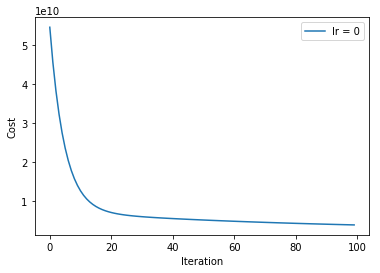

In [41]:
itplot = range(ite)
plt.plot(itplot, cost, label='lr = %d' %lr)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()


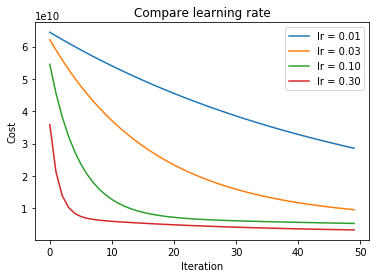

In [67]:
lrs = [.01, .03, .1, .3]
for lr in lrs:
    theta_op, cost = GD2(theta_init, X_nor, Y, lr, ite)
    itplot = range(ite)
    plt.plot(itplot, cost, label='lr = %.2f' %lr)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Compare learning rate')
plt.show()